In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv('Housing.csv')
df.head()
    

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:

# Convert categorical variables to dummy variables
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()
    

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [3]:

# Simple Linear Regression: price vs area
X_simple = df_encoded[['area']]
y = df_encoded['price']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)

simple_lr = LinearRegression()
simple_lr.fit(X_train_s, y_train_s)

y_pred_s = simple_lr.predict(X_test_s)
    

In [5]:

# Multiple Linear Regression: all features
X_multi = df_encoded.drop(columns=['price'])

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.2, random_state=42)

multi_lr = LinearRegression()
multi_lr.fit(X_train_m, y_train_m)

y_pred_m = multi_lr.predict(X_test_m)
    

In [6]:

# Evaluation metrics for both models
results = {
    'Simple_LR': {
        'MAE': mean_absolute_error(y_test_s, y_pred_s),
        'MSE': mean_squared_error(y_test_s, y_pred_s),
        'R2': r2_score(y_test_s, y_pred_s)
    },
    'Multiple_LR': {
        'MAE': mean_absolute_error(y_test_m, y_pred_m),
        'MSE': mean_squared_error(y_test_m, y_pred_m),
        'R2': r2_score(y_test_m, y_pred_m)
    }
}
results
    

{'Simple_LR': {'MAE': 1474748.1337969352,
  'MSE': 3675286604768.185,
  'R2': 0.27287851871974644},
 'Multiple_LR': {'MAE': 970043.403920164,
  'MSE': 1754318687330.6643,
  'R2': 0.6529242642153184}}

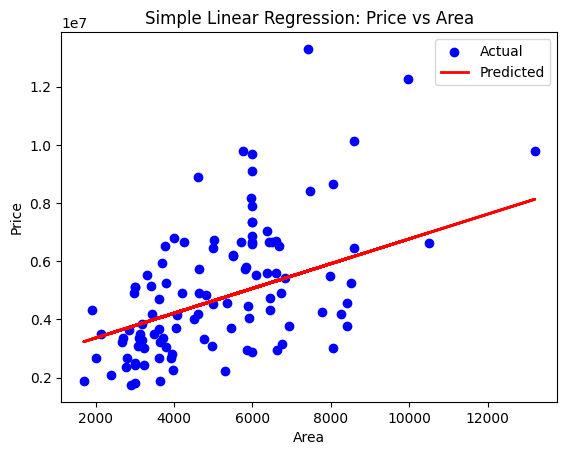

(array([425.72984194]), 2512254.2639593435)

In [7]:

# Plot regression line for Simple LR
plt.scatter(X_test_s, y_test_s, color='blue', label='Actual')
plt.plot(X_test_s, y_pred_s, color='red', linewidth=2, label='Predicted')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Price vs Area')
plt.legend()
plt.show()

# Coefficients
simple_lr.coef_, simple_lr.intercept_
    